### Inference Notebook : Image Classification Task for ML Internship 2023

In [13]:
! pip install tensorflow
! pip install matplotlib
! pip install numpy

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

In [15]:
# CHANGE THE PATH OF DATA_DIR
data_dir = "C:/Users/Camille/Desktop/Image-Classification-for-ML-Internship-2023/EuroSAT/2750"
img_height = 64
img_width = 64

#### 1. Random selection of 20 sample images

In [16]:
subdirs = [f.path for f in os.scandir(data_dir) if f.is_dir()] # list of all subdirectories/classes
labels = [os.path.basename(subdir) for subdir in subdirs] # list of all class names/labels

In [17]:
image_paths = []

for label in labels:
    subdir_path = os.path.join(data_dir, label)
    image_files = os.listdir(subdir_path)
    random.shuffle(image_files)
    for i in range(2): # select 2 random files per subdirectory
        image_path = os.path.join(subdir_path, image_files[i])
        image_paths.append(image_path)
        
image_paths # url list of the 20 random samples
file_names = []
for file_path in image_paths:
    file_name = file_path.split('\\')[-1]  # extract just  the name of the image
    file_names.append(file_name)

#### 2. Load the previously saved model

In [18]:
my_model = tf.keras.models.load_model('saved_model/my_model')

#### 3. Model summary

In [19]:
# Check its architecture
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                      

#### 4. Model predictions on samples

1/1 [==============================] - 0s 298ms/step
This image AnnualCrop_1059.jpg most likely belongs to AnnualCrop with a 100.00 percent confidence.
1/1 [==============================] - 0s 48ms/step
This image AnnualCrop_1946.jpg most likely belongs to AnnualCrop with a 99.92 percent confidence.
1/1 [==============================] - 0s 59ms/step
This image Forest_1644.jpg most likely belongs to Forest with a 99.19 percent confidence.
1/1 [==============================] - 0s 51ms/step
This image Forest_1998.jpg most likely belongs to Forest with a 99.61 percent confidence.
1/1 [==============================] - 0s 34ms/step
This image HerbaceousVegetation_2782.jpg most likely belongs to HerbaceousVegetation with a 52.92 percent confidence.
1/1 [==============================] - 0s 28ms/step
This image HerbaceousVegetation_1542.jpg most likely belongs to HerbaceousVegetation with a 99.82 percent confidence.
1/1 [==============================] - 0s 28ms/step
This image Highway_696

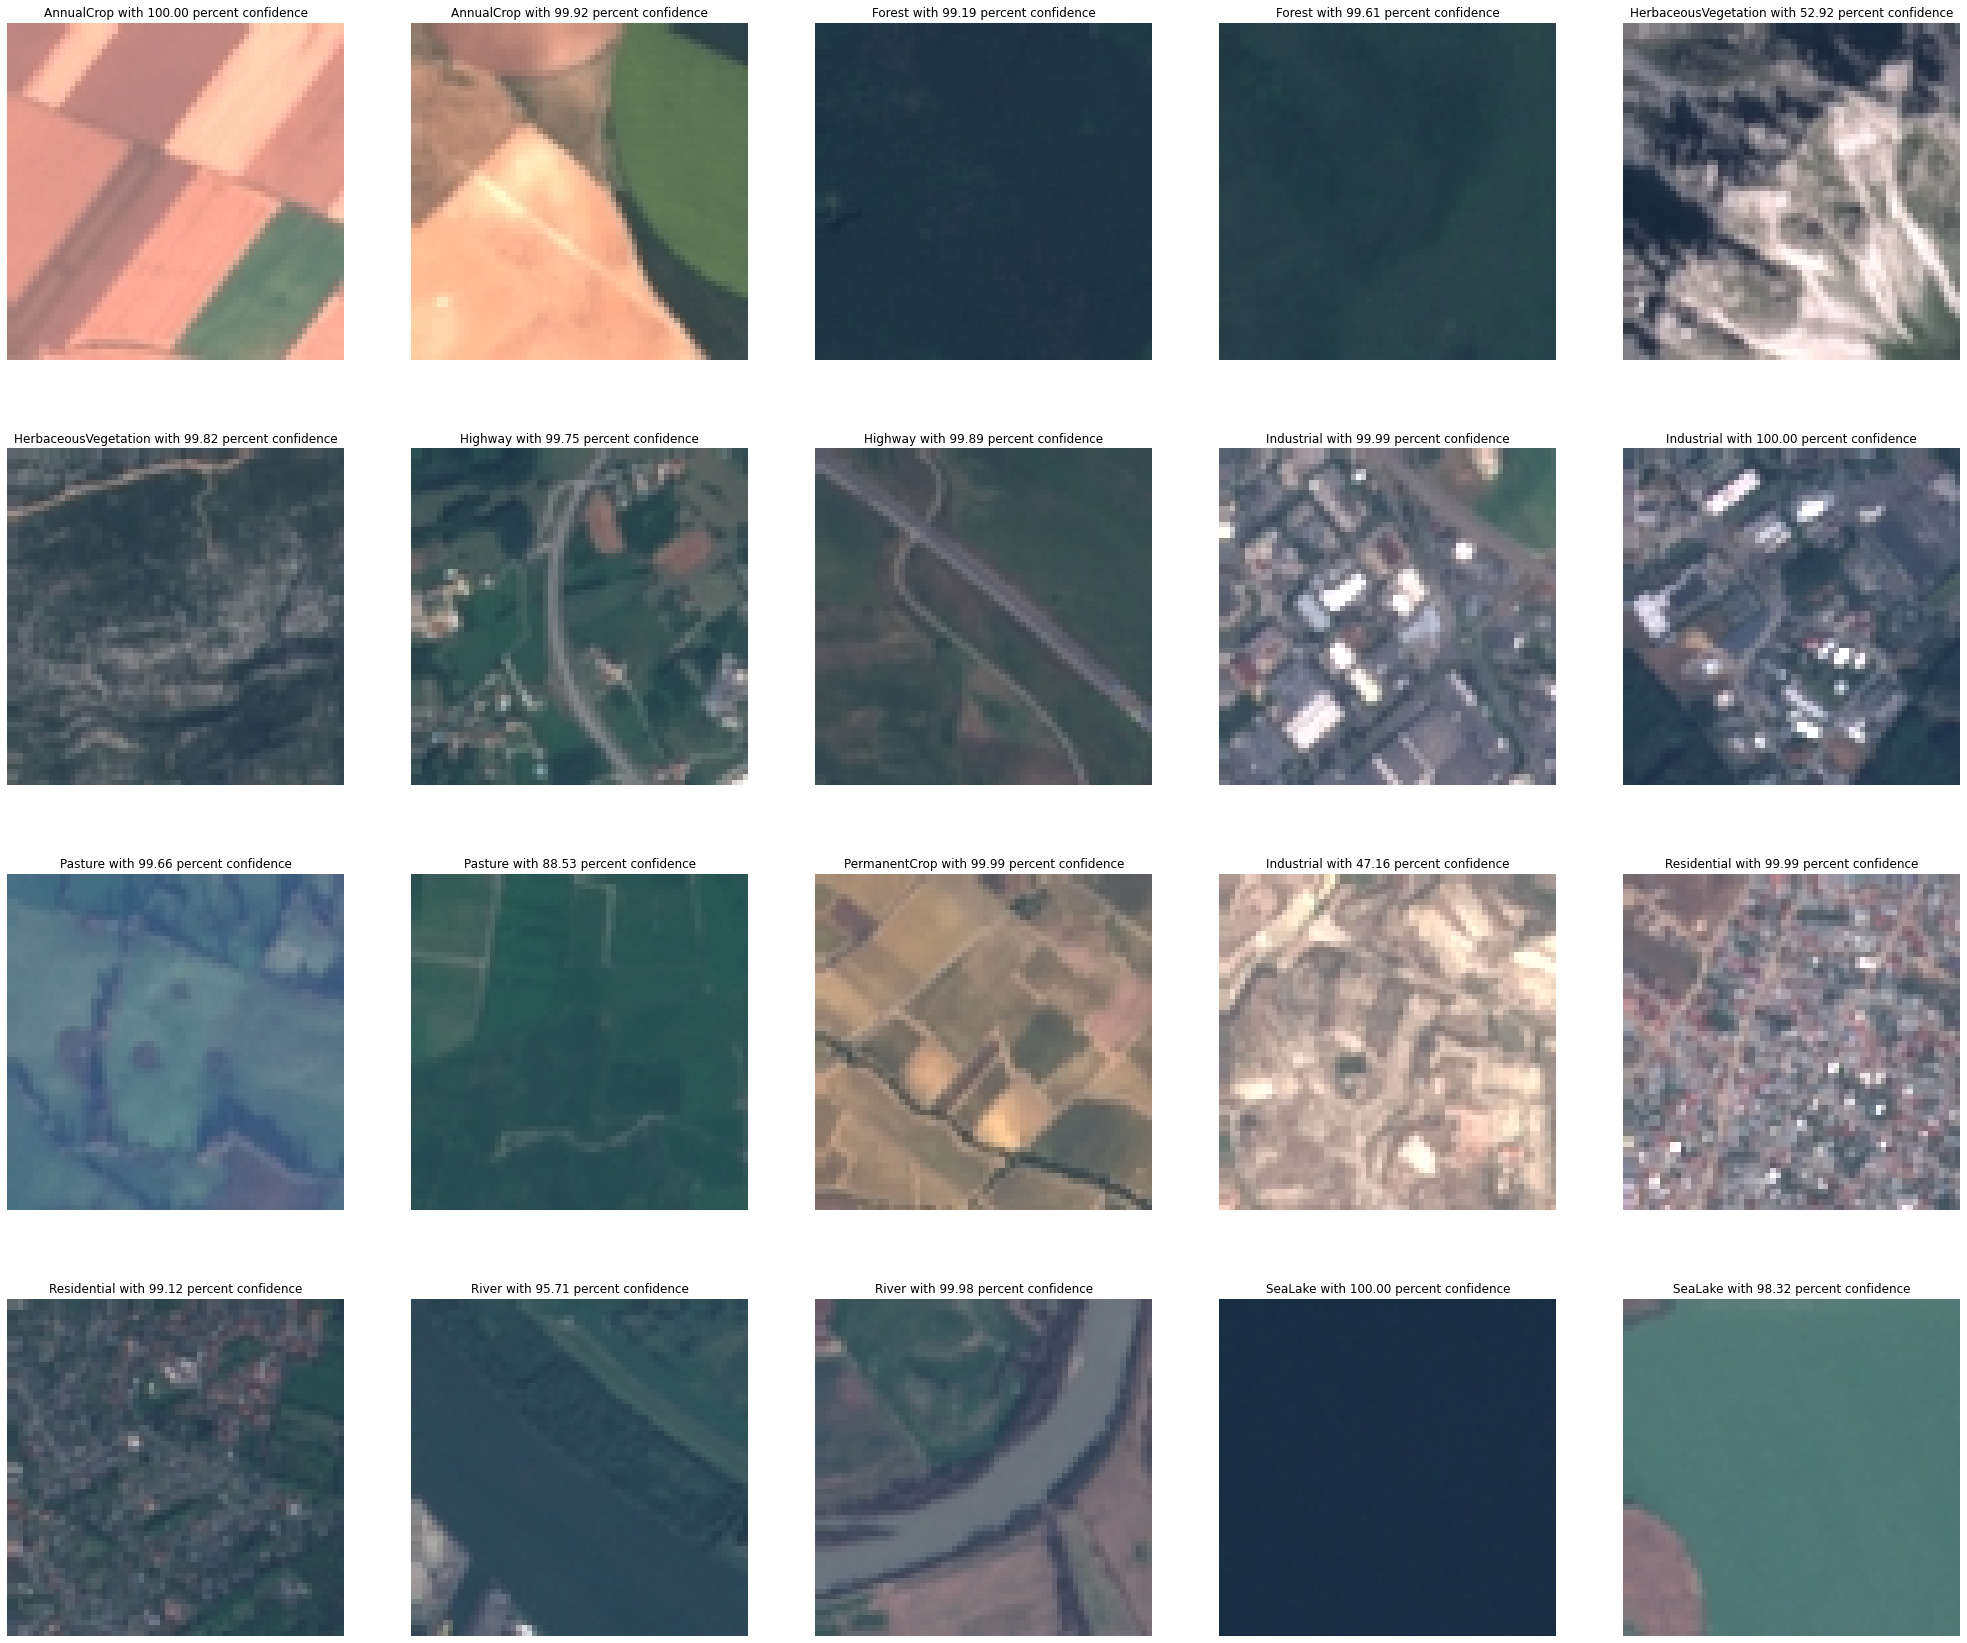

In [20]:
plt.figure(figsize=(35,30))

for i in range(len(image_paths)):
    
    # load 1 image with image path
    img = tf.keras.utils.load_img(
        image_paths[i], target_size=(img_height, img_width)
    )

    # conversion from img to NDArray (which is compatible for the model)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch of 1 image

    predictions = my_model.predict(img_array)
    score = tf.nn.softmax(predictions[0]) # convert the prediction in probabilites 
        
    res = "This image {} most likely belongs to {} with a {:.2f} percent confidence.".format(file_names[i],labels[np.argmax(score)], 100 * np.max(score))
    print(res)

    # display all the images with their classification results
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(img)
    title = "{} with {:.2f} percent confidence".format(labels[np.argmax(score)], 100 * np.max(score))
    plt.title(title)
    ax.axis('off')